### Seeding for reproducibility

In [1]:
import random
random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)


### Importing the dependencies

In [3]:
import os
import json
from zipfile import ZipFile
from PIL import Image #imahe processing

import matplotlib.pyplot as plt
import matplotlib.image as mpimg #load and display image
from tensorflow.keras.preprocessing.image import ImageDataGenerator #data pipeline for testing and training data
from tensorflow.keras import layers, models # cnn , dense , flatening

In [5]:
print(os.listdir("plantvillage dataset"))
print(len(os.listdir("plantvillage dataset/segmented")))
print(os.listdir("plantvillage dataset/segmented")[:5])

print(len(os.listdir("plantvillage dataset/color")))
print(os.listdir("plantvillage dataset/color")[:5])

print(len(os.listdir("plantvillage dataset/grayscale")))
print(os.listdir("plantvillage dataset/grayscale")[:5])

['color', 'grayscale', 'segmented']
38
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy']
38
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy']
38
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy']


#### Classes = 38

In [6]:
print(len(os.listdir("plantvillage dataset/color/Grape___healthy")))

423


In [7]:
print(os.listdir("plantvillage dataset/color/Grape___healthy")[:5])

['00e00912-bf75-4cf8-8b7d-ad64b73bea5f___Mt.N.V_HL 6067.JPG', '0163a6aa-fbf8-47c5-965f-59b6efe8bfe5___Mt.N.V_HL 6103.JPG', '0294ca65-4c29-44be-af28-501df9f715e8___Mt.N.V_HL 6176.JPG', '02f95acb-5d92-4f2a-b7ec-3af8709ee7c9___Mt.N.V_HL 9078.JPG', '03027791-26bb-4c46-960e-8df76e27042c___Mt.N.V_HL 6070.JPG']


## Data Preprocessing



In [8]:
base_dir = r"M:\Projects\Plant Disease Prediction with CNN\plantvillage dataset\color"

(256, 256, 3)


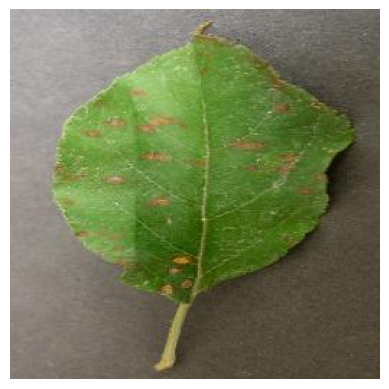

In [9]:
image_path = r"M:\Projects\Plant Disease Prediction with CNN\plantvillage dataset\color\Apple___Cedar_apple_rust\025b2b9a-0ec4-4132-96ac-7f2832d0db4a___FREC_C.Rust 3655.JPG"

img = mpimg.imread(image_path)
#print(img)

print(img.shape)
#Displaying the Image
plt.imshow(img)
plt.axis('off')
plt.show()

In [10]:
#Image Parameters

img_size = 224 #shrinking from 256 to 224
batch_size = 32

## Train Test Split

In [11]:
data_generate = ImageDataGenerator(rescale=1./255
                                   ,validation_split=0.2) 
#20% data for validation
#80% data for testing

In [12]:
# Training Data Generator
train_generator = data_generate.flow_from_directory(
    base_dir,target_size=(img_size,img_size),batch_size=batch_size,subset='training',class_mode='categorical'
)

Found 43456 images belonging to 38 classes.


In [13]:
# Validation Data Generator

valid_generator = data_generate.flow_from_directory(
    base_dir,target_size=(img_size,img_size),batch_size=batch_size,subset='validation',class_mode='categorical'
)

Found 10849 images belonging to 38 classes.


## Convultional Neural Network

In [14]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))


model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(train_generator.num_classes, activation='softmax'))

M:\Projects\Plant Disease Prediction with CNN\plant\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 186624)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │      47,776,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 38)                  │           9,766 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 47,805,158 (182.36 MB)

 Trainable params: 47,805,158 (182.36 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
# Compiling the model

model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy']
             )

## Model Training 

In [17]:
# Training the Model

history = model.fit(
            train_generator,
            steps_per_epoch=train_generator.samples // batch_size,
            epochs=5,
            validation_data=valid_generator,
            validation_steps=valid_generator.samples // batch_size
)

Epoch 1/5


M:\Projects\Plant Disease Prediction with CNN\plant\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1358/1358 ━━━━━━━━━━━━━━━━━━━━ 1009s 741ms/step - accuracy: 0.6050 - loss: 1.8590 - val_accuracy: 0.8530 - val_loss: 0.4553
Epoch 2/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 0s 25us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.4139
Epoch 3/5


C:\Users\Vasanth\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


1358/1358 ━━━━━━━━━━━━━━━━━━━━ 893s 657ms/step - accuracy: 0.9162 - loss: 0.2640 - val_accuracy: 0.8768 - val_loss: 0.3907
Epoch 4/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 0s 18us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 2.6226e-05
Epoch 5/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 917s 675ms/step - accuracy: 0.9674 - loss: 0.1055 - val_accuracy: 0.8575 - val_loss: 0.5611


## Model Evaluation 


In [18]:
print('Evaluating Model')

val_loss , val_accuracy = model.evaluate(valid_generator,steps=valid_generator.samples // batch_size)

print(f'Validation Accuracy : {val_accuracy * 100:.2f}%')

Evaluating Model
339/339 ━━━━━━━━━━━━━━━━━━━━ 41s 121ms/step - accuracy: 0.8620 - loss: 0.5387
Validation Accuracy : 85.75%


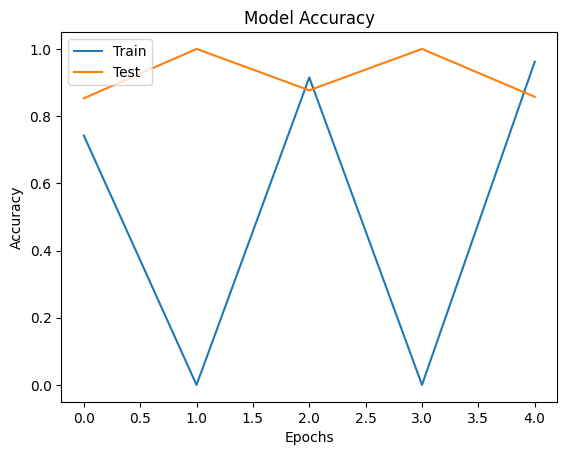

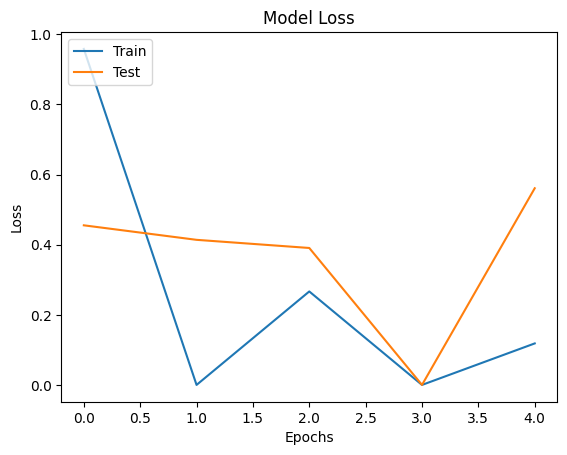

In [20]:
import matplotlib.pyplot as plt

# Plotting Training and Validation accuracy Values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig('model_accuracy.png')  # Save the accuracy plot
plt.show()

# Plotting Training and Validation Loss Values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig('model_loss.png')  # Save the loss plot
plt.show()


## Building a Predictive System


In [21]:
# Function to Load and Preprocess the Image using Pillow
def load_and_preprocess_image(image_path, target_size=(224, 224)):
    # Load the image
    img = Image.open(image_path)
    # Resize the image
    img = img.resize(target_size)
    # Convert the image to a numpy array
    img_array = np.array(img)
    # Add batch dimension
    img_array = np.expand_dims(img_array, axis=0)
    # Scale the image values to [0, 1]
    img_array = img_array.astype('float32') / 255.
    return img_array

# Function to Predict the Class of an Image
def predict_image_class(model, image_path, class_indices):
    preprocessed_img = load_and_preprocess_image(image_path)
    predictions = model.predict(preprocessed_img)
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    predicted_class_name = class_indices[predicted_class_index]
    return predicted_class_name

In [22]:
class_indices = {v: k for k, v in train_generator.class_indices.items()}

In [23]:
class_indices

{0: 'Apple___Apple_scab',
 1: 'Apple___Black_rot',
 2: 'Apple___Cedar_apple_rust',
 3: 'Apple___healthy',
 4: 'Blueberry___healthy',
 5: 'Cherry_(including_sour)___Powdery_mildew',
 6: 'Cherry_(including_sour)___healthy',
 7: 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 8: 'Corn_(maize)___Common_rust_',
 9: 'Corn_(maize)___Northern_Leaf_Blight',
 10: 'Corn_(maize)___healthy',
 11: 'Grape___Black_rot',
 12: 'Grape___Esca_(Black_Measles)',
 13: 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 14: 'Grape___healthy',
 15: 'Orange___Haunglongbing_(Citrus_greening)',
 16: 'Peach___Bacterial_spot',
 17: 'Peach___healthy',
 18: 'Pepper,_bell___Bacterial_spot',
 19: 'Pepper,_bell___healthy',
 20: 'Potato___Early_blight',
 21: 'Potato___Late_blight',
 22: 'Potato___healthy',
 23: 'Raspberry___healthy',
 24: 'Soybean___healthy',
 25: 'Squash___Powdery_mildew',
 26: 'Strawberry___Leaf_scorch',
 27: 'Strawberry___healthy',
 28: 'Tomato___Bacterial_spot',
 29: 'Tomato___Early_blight',
 30: '

In [24]:
json.dump(class_indices, open('class_indices.json', 'w'))

In [25]:
image_path_1 = r"M:\Projects\Plant Disease Prediction with CNN\test\test_apple_black_rot.jpg"
image_path_2 = r"M:\Projects\Plant Disease Prediction with CNN\test\test_blueberry_healthy.jpg"
image_path_3 = r"M:\Projects\Plant Disease Prediction with CNN\test\test_potato_early_blight.jpg"

predicted_class_name_img_1 = predict_image_class(model, image_path_1, class_indices)
predicted_class_name_img_2 = predict_image_class(model, image_path_2, class_indices)
predicted_class_name_img_3 = predict_image_class(model, image_path_3, class_indices)

# Output the result
print("Predicted Class Name for img 1:", predicted_class_name_img_1)
print("Predicted Class Name for img 2:", predicted_class_name_img_2)
print("Predicted Class Name for img 3:", predicted_class_name_img_3)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Predicted Class Name for img 1: Apple___Black_rot
Predicted Class Name for img 2: Blueberry___healthy
Predicted Class Name for img 3: Potato___Early_blight


In [26]:
model.save(r"M:\Projects\Plant Disease Prediction with CNN\plant_disease_prediction_model.h5")